In [1]:
import pandas as pd
import numpy as np

Import the clean data

In [2]:
df = pd.read_csv('lending_club.csv')

In [3]:
df.shape

(877986, 106)

We need to further refine our data to make it ready as a pre-processing step to build machine learning models on it.
We will be removing columns that are not necessary for our model. Those columns include:

1. Columns that contribute to data leakage. That means it has the data from the future. The prediction of probability of
   loan default is made at the time of approving the loan application, so any data that will not be available at that
   point of time (i.e. loan approval stage) is removed.
2. Columns that have redundant data. Multiple columns capture similar data. We do not need all those columns. One will be 
   enough
3. Columns that need lot of feature engineering in order to be useful for our model
4. Also, dropping the columns that have lot of categorical values in case we haven't dropped them already

Let's look at our columns in three batches and remove columns that are not useful for our model

In [4]:
columns = list(df.columns.values) #Making a list of columns

First set of columns

In [9]:
columns[:31]

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util']

The following columns need to be removed

1. Columns with data leakage: funded_amnt, funded_amnt_inv, issue_d, pymnt_plan
2. Columns with data redundancy: 'int_rate' and 'sub_grade'. Similar data is captured in 'grade' column, so dropping the rest two. Also, dropping 'title', because similar data is captured by 'purpose' column
                                 
3. Columns that are not useful or with too many categorical values: url, zip_code, addr_state
4. Columns that need lot of feature engineering to be able to drop: earliest_cr_line

In [10]:
drop_col = ['funded_amnt','funded_amnt_inv','issue_d','pymnt_plan','int_rate','sub_grade','title','url',
            'zip_code','addr_state','earliest_cr_line']

In [11]:
df.drop(drop_col,axis=1,inplace=True)

Let's look at our second set of columns

In [14]:
columns[31:61]

['total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m']

The following columns needs to be dropped

1. Columns that have data leakage: out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int,                                        total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt

2. Columns that are not useful or need lot of feature engineering to use them: last_credit_pull_d, collections_12_mths_ex_med

In [15]:
drop_col1 = ['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
             'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
             'last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med']

In [16]:
df.drop(drop_col1,axis=1,inplace=True)

Now lets look at our last set of columns

In [17]:
columns[61:]

['open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

No columns need to be removed

In [18]:
df.shape #We are left with 82 columns

(877986, 82)

We also need to drop last_fico_range_high and last_fico_range_low because they contribute to data leakage and are
captured after loan was sanctioned.
We should keep fico_range_high and fico_range_low which are captured when loan was sanctioned

In [19]:
df.drop(['last_fico_range_high','last_fico_range_low'],axis=1,inplace=True)

Design the target variable: 
We will take only the data that has loan_status as either fully paid, charged off or Default. 
Remaining loan status classes doesnt say with certainty whether a loan will be defaulted or not. So, we are considering
                                                                            the data with only those three classes (fully paid, charged off, default)

Lets map 'Fully Paid' as 1 and 'Charged off' or 'Default' as 0 in Target Variable

In [22]:
loans = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off') | (df['loan_status']=='Default')]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0, "Default": 0}}
loans = loans.replace(mapping_dictionary)

Lets have a look at our Categorical Columns

In [24]:
loans.select_dtypes(include='object').columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'revol_util', 'initial_list_status', 'application_type',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [25]:
loans['revol_util'].head() #It needs to be stripped that % and converted into int or float

0     78.40%
4     89.70%
5     12.40%
7     40.60%
11       33%
Name: revol_util, dtype: object

revol_util columns needs % to be stripped off and converted to float

In [26]:
loans['revol_util']=loans['revol_util'].apply(lambda x: x.strip('%'))
loans['revol_util'] = loans['revol_util'].astype(float)

Among the categorical columns there are two types of values: Ordinal and Nominal.
Lets look at Ordinal Columns first.
We need to replace them with ordered numbers.
Ordinal Columns are :  Grade and Emp Length.

In [27]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}
loans = loans.replace(mapping_dict)
loans[['emp_length','grade']].head()

,emp_length,grade
0,2,2
4,10,3
5,1,3
7,1,4
11,1,2


In [35]:
loans['emp_length'] = loans['emp_length'].astype(int)

Now lets look at Nominal Columns.
We need to encode them using Pandas Dummies

In [36]:

loans.select_dtypes(include='object').columns

Index(['term', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [37]:
nominal_col = ['term','home_ownership','verification_status','purpose','initial_list_status',
               'application_type','hardship_flag','disbursement_method','debt_settlement_flag']

In [39]:
dummy_df = pd.get_dummies(loans[nominal_col])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(nominal_col, axis=1)

Our data is ready to build ML models

Now lets build some classification models to predict the probability of loan default.

Import necessary functions

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

Set X and y data. Split them into train and test data

In [49]:
X = loans.drop('loan_status',axis=1)
y = loans['loan_status']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=101)

Build a logistic regression model

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
pred = lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.58      0.00      0.00     24482
           1       0.76      1.00      0.87     79262

   micro avg       0.76      0.76      0.76    103744
   macro avg       0.67      0.50      0.43    103744
weighted avg       0.72      0.76      0.66    103744



In [54]:
print(confusion_matrix(y_test,pred))

[[   11 24471]
 [    8 79254]]


Logistic Regression performed poorly

Now let's build a Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators = 200, random_state=101)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [57]:
pred = rf.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.18      0.30     24482
           1       0.80      0.99      0.88     79262

   micro avg       0.80      0.80      0.80    103744
   macro avg       0.80      0.58      0.59    103744
weighted avg       0.80      0.80      0.74    103744

[[ 4437 20045]
 [ 1052 78210]]


Extreme Gradient Boosting Classifier

In [59]:
from xgboost import XGBClassifier

In [60]:
gb = XGBClassifier(n_estimators=1000,learning_rate=0.05,n_jobs=2)
gb.fit(X_train,y_train,
       early_stopping_rounds=5,
      eval_set=[(X_test, y_test)],
      verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=2, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [61]:
gb = XGBClassifier(n_estimators=1000,learning_rate=0.05,n_jobs=2)
gb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=2, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [68]:
pred = gb.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred,labels=[1,0]))

              precision    recall  f1-score   support

           0       0.75      0.22      0.35     24482
           1       0.80      0.98      0.88     79262

   micro avg       0.80      0.80      0.80    103744
   macro avg       0.78      0.60      0.61    103744
weighted avg       0.79      0.80      0.76    103744

[[77435  1827]
 [18983  5499]]


LightGBM Classifier

In [72]:
from lightgbm import LGBMClassifier

In [81]:
lgbm = LGBMClassifier(nthread=4, n_estimators = 10000, learning_rate=0.05, num_leaves=32,colsample_bytree=0.9497036,
                      subsample=0.8715623,max_depth=8,reg_alpha=0.04,reg_lambda=0.073,min_split_gain=0.0222415,
                      min_child_weight=40, silent=-1, verbose=-1, random_state=101)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9497036, importance_type='split',
        learning_rate=0.05, max_depth=8, min_child_samples=20,
        min_child_weight=40, min_split_gain=0.0222415, n_estimators=10000,
        n_jobs=-1, nthread=4, num_leaves=32, objective=None,
        random_state=101, reg_alpha=0.04, reg_lambda=0.073, silent=-1,
        subsample=0.8715623, subsample_for_bin=200000, subsample_freq=0,
        verbose=-1)

In [83]:
pred = lgbm.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.28      0.39     24482
           1       0.81      0.95      0.88     79262

   micro avg       0.79      0.79      0.79    103744
   macro avg       0.72      0.62      0.63    103744
weighted avg       0.77      0.79      0.76    103744

[[ 6916 17566]
 [ 3911 75351]]


Light GBM with K fold cross validation

In [87]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

In [93]:
def kfold_lightgbm(train_df, num_folds, stratified = False):
    print("Starting LightGBM. Train shape: {}".format(train_df.shape))
    
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=47)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=47)

    oof_preds = np.zeros(train_df.shape[0])

    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['loan_status']]
    
    # Splitting the training set into folds for Cross Validation
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['loan_status'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['loan_status'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['loan_status'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )

        # Fitting the model and evaluating by AUC
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
        print(classification_report(valid_y, clf.predict(valid_x)))
        print(confusion_matrix(valid_y, clf.predict(valid_x)))
        

In [94]:
kfold_lightgbm(loans, num_folds= 3, stratified= False)

Starting LightGBM. Train shape: (345811, 103)
Training until validation scores don't improve for 200 rounds.
[1000]	training's binary_logloss: 0.421343	training's auc: 0.802689	valid_1's binary_logloss: 0.447782	valid_1's auc: 0.766202
[2000]	training's binary_logloss: 0.403663	training's auc: 0.828703	valid_1's binary_logloss: 0.447157	valid_1's auc: 0.767405
Early stopping, best iteration is:
[1951]	training's binary_logloss: 0.40448	training's auc: 0.827531	valid_1's binary_logloss: 0.447136	valid_1's auc: 0.767432
              precision    recall  f1-score   support

           0       0.72      0.24      0.36     27436
           1       0.80      0.97      0.88     87835

   micro avg       0.80      0.80      0.80    115271
   macro avg       0.76      0.61      0.62    115271
weighted avg       0.78      0.80      0.76    115271

[[ 6584 20852]
 [ 2564 85271]]
Training until validation scores don't improve for 200 rounds.
[1000]	training's binary_logloss: 0.42301	training's au

Lets plot ROC curves for the models built

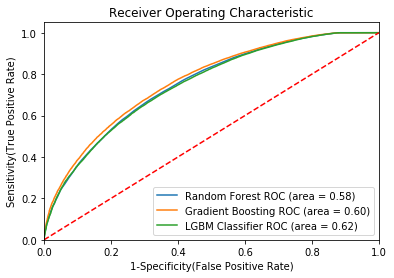

In [95]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 200, random_state=101),
},
{
    'label': 'Gradient Boosting',
    'model': XGBClassifier(n_estimators=1000,learning_rate=0.05),
},    
{
    'label': 'LGBM Classifier',
    'model': LGBMClassifier(nthread=4, n_estimators = 10000, learning_rate=0.05, num_leaves=32,colsample_bytree=0.9497036,
                      subsample=0.8715623,max_depth=8,reg_alpha=0.04,reg_lambda=0.073,min_split_gain=0.0222415,
                      min_child_weight=40, silent=-1, verbose=-1, random_state=101),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

After looking at classification reports, confuison matrix and AUC, it looks like Light GBM Classifier is performing slightly better than Random Forest and Extreme Gradient Boosting.Hence we should use LGBMClassifier for our data.

However our data has imbalanced classes and hence need extensive resampling techniques for models to perform better.
